In [1]:
from ngsolve import *
from ngsolve.webgui import Draw
from ngsolve.meshes import MakeStructured2DMesh
from netgen.geom2d import unit_square
from ngsolve.la import EigenValues_Preconditioner
import numpy as np
import math
import scipy.linalg
from random import random
import scipy.sparse as sp
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D
from ngsolve.solvers import *
from ngsolve.meshes import Make1DMesh

In [2]:
mesh_1 = Make1DMesh(200, mapping=None, periodic=False)

fesw = H1(mesh_1, order=2, dirichlet="left|right")
fessigma = H1(mesh_1, order=2, dirichlet=" ")

w,v = fesw.TnT()
sigma,tau = fessigma.TnT()

a = BilinearForm(sigma*tau*dx).Assemble()
b = BilinearForm(grad(w)*grad(tau)*dx).Assemble()

k = BilinearForm(grad(w)*grad(v)*dx).Assemble()

S = b.mat.T @ a.mat.Inverse() @ b.mat
print (S.GetOperatorInfo())

pre = b.mat.Inverse(fesw.FreeDofs())
pre = pre@pre   # precond for 4th order problem
evals, evecs = solvers.LOBPCG(S, b.mat, pre=pre, num=5, maxit=100)

ProductMatrix, h = 401, w = 401
  ProductMatrix, h = 401, w = 401
    Transpose, h = 401, w = 401
      SparseMatrixd, h = 401, w = 401
    N4ngla14UmfpackInverseIdddEE, h = 401, w = 401
  SparseMatrixd, h = 401, w = 401

0 : [197.73506123252236, 470.66173940945083, 1817.673633612861, 6816.345267423533, 10832.79604260262]
1 : [97.69476782698908, 139.31907381773328, 526.3896122885882, 4129.672652741233, 6360.310539459624]
2 : [59.910040002492835, 103.60825339664117, 266.5597154739335, 2732.149358247689, 4511.733623905809]
3 : [49.15067344881187, 96.12319019981607, 217.58431064514568, 1317.7191411108715, 2700.3072185720116]
4 : [46.315883412450816, 91.50150264925605, 203.2041504611737, 560.0905717981766, 1456.2749399922573]
5 : [44.72495446672635, 86.2674222722012, 187.78860773763418, 324.77379512927996, 655.607132916466]
6 : [43.52007607661464, 83.41432143911759, 172.78615645910068, 277.8099368302257, 458.2413786178207]
7 : [43.07209444048982, 82.55140713603116, 167.19167894647958, 267.

78 : [39.47851151258977, 80.76357668578459, 157.91546016452165, 238.74792279124296, 355.52506422591784]
79 : [39.47850161664687, 80.76347395242705, 157.91528969348, 238.74568269710903, 355.50179115146796]
80 : [39.47848903032589, 80.76341434175166, 157.9150758854801, 238.7440944737118, 355.4727677053228]
81 : [39.478479163780335, 80.76337635530325, 157.91490177381698, 238.7426615917209, 355.45046522718087]
82 : [39.47847159244383, 80.76333990365721, 157.91475780641912, 238.74101703863238, 355.4344536575376]
83 : [39.478465454069145, 80.76328135732594, 157.9146235188959, 238.73815831251036, 355.4224630065955]
84 : [39.47846144231011, 80.76320117653307, 157.91451950374363, 238.7340617176834, 355.41483648954255]
85 : [39.47845859519583, 80.76313816582142, 157.91443767352462, 238.73080824690607, 355.4093596816554]
86 : [39.4784563681959, 80.76310782036893, 157.9143802572026, 238.72924287140003, 355.40440779172195]
87 : [39.47845384690167, 80.763096114321, 157.91432446901592, 238.7285128118

In [3]:
gfw_eigen_vector = GridFunction(fesw)
gfw_eigen_vector.vec.data = evecs[0]
first_eigen_vector = gfw_eigen_vector

Text(0, 0.5, 'Eigen Vector')

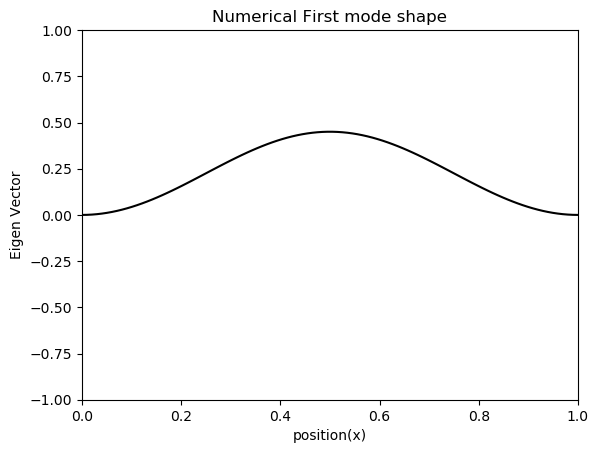

In [4]:
x=np.linspace(0,1,100)
plt.plot(x,first_eigen_vector(mesh_1(x)),color='black',label='  ',linestyle="-")
plt.ylim([-1, 1])
plt.xlim([0, 1.0])
plt.title("Numerical First mode shape")
plt.xlabel("position(x)")
plt.ylabel("Eigen Vector")

In [5]:
first_eigen_vector(0.5)

0.45015608466102974

(0, 0.25)

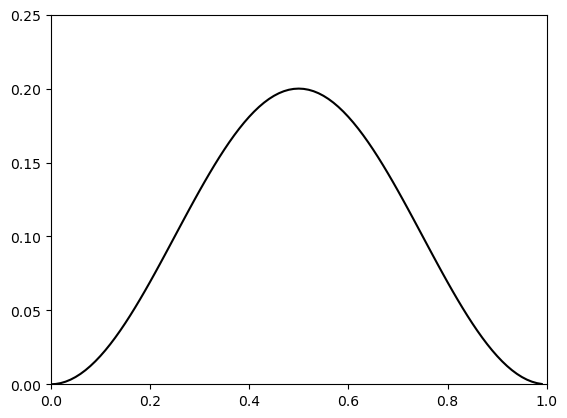

In [6]:
static_deflection = 0.25
x_1 = np.arange(0,1,0.01)
axial_load = 4.01*pi**2
lamda_1 = 2*pi
lamda_2 = 8.9869
c_1 = 2*np.emath.sqrt((axial_load)/(lamda_1**2)-1)
exact_solution_1 = c_1*(1 - ((lamda_1*(1-cos(lamda_1)))/(lamda_1 - sin(lamda_1)))*x_1 - \
                        np.cos(lamda_1*x_1) + \
                        ((1 - cos(lamda_1))/(lamda_1 - sin(lamda_1)))*np.sin(lamda_1*x_1))
plt.plot(x_1,exact_solution_1,color='black',label='Exact',linestyle='-')
plt.xlim([0,1])
plt.ylim([0,0.25])

In [ ]:
x_2 = 0.5
exact_solution_2 = c_1*(1 - ((lamda_1*(1-cos(lamda_1)))/(lamda_1 - sin(lamda_1)))*x_2 - \
                        np.cos(lamda_1*x_2) + \
                        ((1 - cos(lamda_1))/(lamda_1 - sin(lamda_1)))*np.sin(lamda_1*x_2))
exact_solution_2

In [7]:
L = 1
L_1 = 0.01
mesh = MakeStructured2DMesh(quads=True, nx=50,ny=50, mapping= lambda x,y : (L*(x),L_1*(y)))

# mesh = Mesh (unit_square.GenerateMesh(maxh=0.03))
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [8]:
axial_load_1= 4.01*pi**2
nu = 0.27
lambda_1 = 2*pi

In [9]:
Q = H1(mesh, order=2, dirichlet=".*")
V = HDivDiv(mesh, order=1)
X = Q*Q*V*V
(w,F,sigma,tau), (dw,dF,dsigma,dtau) = X.TnT()

In [13]:
n = specialcf.normal(2)

def tang(u): return u-(u*n)*n

B = BilinearForm(X)

B += (div(sigma)*grad(dw) -InnerProduct(Cof(sigma),tau)*dw + axial_load_1*Grad(w)*Grad(dw))*dx - ((sigma*n)*tang(grad(dw)))*dx(element_boundary=True)

B += (InnerProduct(sigma,dsigma) + div(dsigma)*grad(w))*dx - ((dsigma*n)*tang(grad(w)))*dx(element_boundary=True)

B += (div(tau)*grad(dF) + 6*(1-nu**2)*(InnerProduct(Cof(sigma),sigma))*dF)*dx - ((tau*n)*grad(dF))*dx(element_boundary=True)

B += (InnerProduct(tau,dtau) + div(dtau)*grad(F))*dx - ((dtau*n)*tang(grad(F)))*dx(element_boundary=True)


gfsol = GridFunction(X)


gfw,gfF,gfsigma,gftau = gfsol.components

# exact_solution = 2*np.emath.sqrt((axial_load_1)/(lambda_1**2)-1)
# gfw.Set((exact_solution.real*(1-cos(lambda_1*x))))

gfw.Set(first_eigen_vector)

# gfw.Set(1-cos(2*pi*x))
solvers.Newton(B,gfsol,inverse="umfpack")

Newton iteration  0
err =  0.6283192899333484
Newton iteration  1
err =  1.2625933033719518e-08
Newton iteration  2
err =  2.1071308664389543e-12


(0, 3)

In [14]:
gfw,gfF,gfsigma,gftau = gfsol.components
Draw(gfw, mesh, name="u", deformation=True)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [15]:
gfw(0.5,0.005)

0.4501562892658394

In [ ]:
max(gfw.vec)

In [ ]:
0.45015608466102974